In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K

from sklearn.model_selection import KFold
from keras.models import Model, Sequential
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [11]:
from ipynb.fs.full.DatasetManage import read_and_store_data
from ipynb.fs.full.FeatureExtraction import feature_extraction
from ipynb.fs.full.ClassificationPerformanceIndexes import classificationPerformanceIndexes, printClassificationPerformanceIndexes
from ipynb.fs.full.ClassificationMethods import CompleteLSTM

Parameter

In [12]:
perfInd = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'MCC', 'Kappa', 'Time']
channels = ['FP1-F7', 'F7-T7','T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'seizure']

dataset = 'CHB_MIT'
csvImportFile = 'CHB.csv'
csvExportFile = 'CHB.csv'
sample_rate = 256
time_window = 2
step = time_window * sample_rate

test_ratio = 0.3

pca_tolerance = 0.9

undersampling_rate = 0.2

oversampling_neighbors = 11

k_fold = 5

csvAverageFile = 'Features.csv'

batch = 10
epochs = 100
dropout_percentage = 0.2
loss_function = 'mean_squared_error'
metric = 'accuracy'

Create Training and Test Data

In [13]:
def trainTestData (features, test_ratio, k_fold, perfInd):
    x = features.loc[:, features.columns != 'seizure']
    y = features['seizure']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_ratio, shuffle = True)
    results = pd.DataFrame(columns = perfInd)
    kf = KFold(n_splits = k_fold, shuffle = True)
    return x_train, x_test, y_train, y_test, results, kf

Read and Store Data

In [14]:
print('Reading data from', csvImportFile)
df = pd.read_csv(csvImportFile, delimiter = ',', header = 0)

Reading data from CHB.csv


Feature Extraction 

In [15]:
# ft = feature_extraction(df, sample_rate, step, pca_tolerance, undersampling_rate, oversampling_neighbors)

Train and Test process

In [16]:
ft = pd.read_csv(csvAverageFile, delimiter = ',', header = 0)

In [17]:
x_train, x_test, y_train, y_test, results, kf = trainTestData (ft, test_ratio, k_fold, perfInd)

x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
y_train = y_train.values.astype(int)
x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
y_test = y_test.values.astype(int)

In [18]:
model = Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(None, x_train.shape[-1])))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(1))


history = model.fit(x_train,
                    steps_per_epoch=500,
                    epochs=2)


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

1D Convolutional Model

In [ ]:
# Definizione dell'architettura della rete neurale

num_classes = 2
input_channels = 87

model = tf.keras.Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(1, input_channels)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compilazione del modello
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model.compile(optimizer='rmsprop', loss='mae')

# Training 

# X_train = X_train.reshape(-1, input_length, input_channels)

num_epochs = 20
batch_size = 8
model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size)

# Evaluation of the model

# X_test = X_test.reshape(-1, input_length, input_channels)
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)

# Utilizzo del modello per effettuare predizioni
predictions = model.predict(x_test)


1D CN

In [ ]:
model = Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(None, x_train.shape[-1])))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae')
history = model.fit(x_train,
                    y_train,
                    steps_per_epoch=350,
                    epochs=20)

GRU

In [110]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae', metrics=['accuracy'])
history0= model.fit(x_train,
                    y_train,
                    steps_per_epoch=500,
                    epochs=40)


Epoch 1/40
500/500 [==============================] - 3s 2ms/step - loss: 0.2975 - accuracy: 0.8840
Epoch 2/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1716 - accuracy: 0.9520
Epoch 3/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1476 - accuracy: 0.9640
Epoch 4/40
500/500 [==============================] - 1s 3ms/step - loss: 0.1261 - accuracy: 0.9700
Epoch 5/40
500/500 [==============================] - 1s 3ms/step - loss: 0.1134 - accuracy: 0.9780
Epoch 6/40
500/500 [==============================] - 1s 2ms/step - loss: 0.0931 - accuracy: 0.9880
Epoch 7/40
500/500 [==============================] - 1s 2ms/step - loss: 0.0946 - accuracy: 0.9760
Epoch 8/40
500/500 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9780
Epoch 9/40
500/500 [==============================] - 1s 2ms/step - loss: 0.0809 - accuracy: 0.9780
Epoch 10/40
500/500 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9840

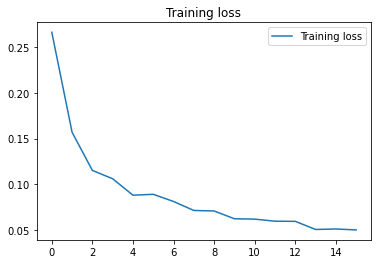

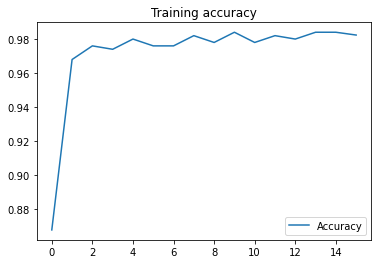

In [83]:
loss = history0.history['loss']
acc = history0.history['accuracy']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()


plt.figure()

plt.plot(epochs, acc, label='Accuracy')
plt.title('Training accuracy')
plt.legend()

plt.show()

Tentativo 1

In [84]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(64, input_shape=(None, x_train.shape[-1]), return_sequences=True))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.001)  # Utilizzo dell'ottimizzatore Adam con un learning rate più basso
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history1 = model.fit(x_train,
                    y_train,
                    steps_per_epoch=500,
                    epochs=15)


Epoch 1/15
500/500 [==============================] - 5s 3ms/step - loss: 0.2474 - accuracy: 0.9220
Epoch 2/15
500/500 [==============================] - 2s 3ms/step - loss: 0.0728 - accuracy: 0.9800
Epoch 3/15
500/500 [==============================] - 2s 3ms/step - loss: 0.0486 - accuracy: 0.9840
Epoch 4/15
500/500 [==============================] - 2s 3ms/step - loss: 0.0370 - accuracy: 0.9860
Epoch 5/15
500/500 [==============================] - 1s 3ms/step - loss: 0.0298 - accuracy: 0.9900
Epoch 6/15
500/500 [==============================] - 2s 3ms/step - loss: 0.0145 - accuracy: 0.9940
Epoch 7/15
500/500 [==============================] - 2s 3ms/step - loss: 0.0124 - accuracy: 0.9960
Epoch 8/15
500/500 [==============================] - 2s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 9/15
500/500 [==============================] - 1s 3ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 10/15
500/500 [==============================] - 2s 3ms/step - loss: 3.9036e-04 - accuracy: 1.

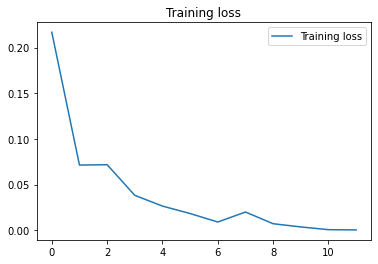

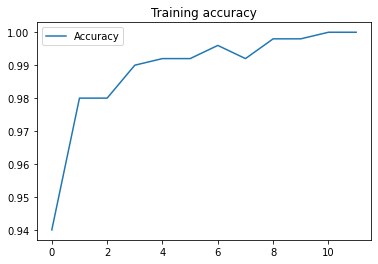

In [75]:
loss = history1.history['loss']
acc = history1.history['accuracy']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()


plt.figure()

plt.plot(epochs, acc, label='Accuracy')
plt.title('Training accuracy')
plt.legend()

plt.show()

Tentativo 2

In [68]:
from keras import layers, optimizers
from keras.models import Sequential

model = Sequential()
model.add(layers.GRU(64, input_shape=(None, x_train.shape[-1]), return_sequences=True))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history2 = model.fit(x_train,
                    y_train,
                    batch_size=32,  # Modifica: Riduci le dimensioni del batch
                    epochs=20,  # Modifica: Aumenta il numero di epoche
                    validation_split=0.2)  # Modifica: Aggiungi la validazione durante l'addestramento


Epoch 1/20
10/10 [==============================] - 5s 79ms/step - loss: 0.6196 - accuracy: 0.7380 - val_loss: 0.5595 - val_accuracy: 0.8354
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 0.4622 - accuracy: 0.9073 - val_loss: 0.4515 - val_accuracy: 0.8481
Epoch 3/20
10/10 [==============================] - 0s 9ms/step - loss: 0.3418 - accuracy: 0.9233 - val_loss: 0.3720 - val_accuracy: 0.8734
Epoch 4/20
10/10 [==============================] - 0s 10ms/step - loss: 0.2483 - accuracy: 0.9457 - val_loss: 0.3226 - val_accuracy: 0.8734
Epoch 5/20
10/10 [==============================] - 0s 11ms/step - loss: 0.1875 - accuracy: 0.9617 - val_loss: 0.2954 - val_accuracy: 0.8734
Epoch 6/20
10/10 [==============================] - 0s 11ms/step - loss: 0.1508 - accuracy: 0.9681 - val_loss: 0.2799 - val_accuracy: 0.8861
Epoch 7/20
10/10 [==============================] - 0s 11ms/step - loss: 0.1240 - accuracy: 0.9776 - val_loss: 0.2734 - val_accuracy: 0.8861
Epoch 8/20
10/1

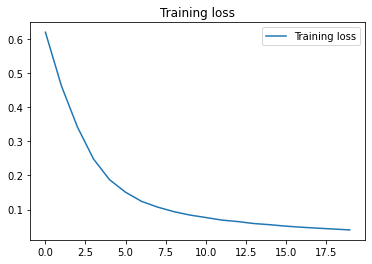

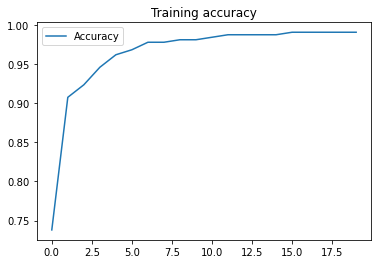

In [85]:
loss = history2.history['loss']
acc = history2.history['accuracy']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()


plt.figure()

plt.plot(epochs, acc, label='Accuracy')
plt.title('Training accuracy')
plt.legend()

plt.show()

Tentativo 3

Confronto original, tentativo, tentativo 2 e tentativo 3 


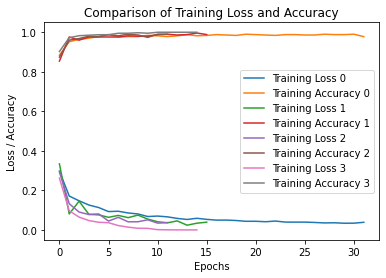

In [111]:
import matplotlib.pyplot as plt

# Primo plot
loss0 = history0.history['loss']
acc0 = history0.history['accuracy']
epochs0 = range(len(loss0))
plt.plot(epochs0, loss0, label='Training Loss 0')
plt.plot(epochs0, acc0, label='Training Accuracy 0')

# Secondo plot
loss1 = history1.history['loss']
acc1 = history1.history['accuracy']
epochs1 = range(len(loss1))
plt.plot(epochs1, loss1, label='Training Loss 1')
plt.plot(epochs1, acc1, label='Training Accuracy 1')

# Terzo plot
loss2 = history2.history['loss']
acc2 = history2.history['accuracy']
epochs2 = range(len(loss2))
plt.plot(epochs2, loss2, label='Training Loss 2')
plt.plot(epochs2, acc2, label='Training Accuracy 2')

# Quarto plot
loss3 = history3.history['loss']
acc3 = history3.history['accuracy']
epochs3 = range(len(loss3))
plt.plot(epochs3, loss3, label='Training Loss 3')
plt.plot(epochs3, acc3, label='Training Accuracy 3')

# Grafico combinato
plt.title('Comparison of Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()

# Mostra il grafico
plt.show()

Dropout

Epoch 1/40
500/500 [==============================] - 2s 2ms/step - loss: 0.3820 - accuracy: 0.8120
Epoch 2/40
500/500 [==============================] - 1s 2ms/step - loss: 0.2452 - accuracy: 0.9180
Epoch 3/40
500/500 [==============================] - 1s 2ms/step - loss: 0.2033 - accuracy: 0.9320
Epoch 4/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1702 - accuracy: 0.9580
Epoch 5/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1578 - accuracy: 0.9500
Epoch 6/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1399 - accuracy: 0.9740
Epoch 7/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1264 - accuracy: 0.9620
Epoch 8/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1155 - accuracy: 0.9680
Epoch 9/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1170 - accuracy: 0.9740
Epoch 10/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1102 - accuracy: 0.9760

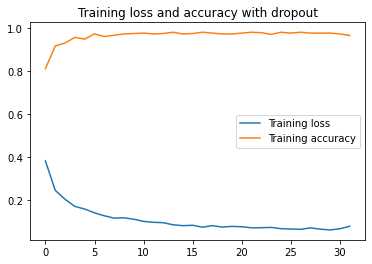

In [95]:
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae', metrics=["accuracy"])
history = model.fit(x_train,
                    y_train,
                    steps_per_epoch=500,
                    epochs=40)


# Plot 

loss = history.history['loss']
acc = history.history['accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training loss and accuracy with dropout')
plt.legend()

plt.show()



Dropout tentativo 1

Epoch 1/20
500/500 [==============================] - 9s 13ms/step - loss: 0.3342 - accuracy: 0.8540
Epoch 2/20
500/500 [==============================] - 7s 13ms/step - loss: 0.0809 - accuracy: 0.9760
Epoch 3/20
500/500 [==============================] - 7s 13ms/step - loss: 0.1456 - accuracy: 0.9600
Epoch 4/20
500/500 [==============================] - 7s 14ms/step - loss: 0.0791 - accuracy: 0.9760
Epoch 5/20
500/500 [==============================] - 7s 13ms/step - loss: 0.0764 - accuracy: 0.9760
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 0.0640 - accuracy: 0.9760
Epoch 7/20
500/500 [==============================] - 7s 15ms/step - loss: 0.0736 - accuracy: 0.9760
Epoch 8/20
500/500 [==============================] - 7s 15ms/step - loss: 0.0623 - accuracy: 0.9820
Epoch 9/20
500/500 [==============================] - 8s 16ms/step - loss: 0.0752 - accuracy: 0.9800
Epoch 10/20
500/500 [==============================] - 8s 16ms/step - loss: 0.0548 - accura

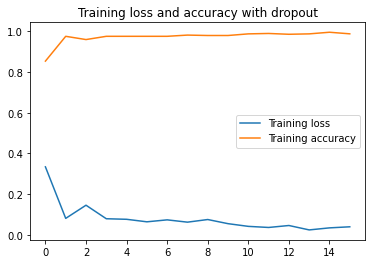

In [107]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(64,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.001)  # Utilizzo dell'ottimizzatore Adam con un learning rate più basso
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history1 = model.fit(x_train,
                    y_train,
                    steps_per_epoch=500,
                    epochs=20)

# Plot 

loss = history1.history['loss']
acc = history1.history['accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training loss and accuracy with dropout')
plt.legend()

plt.show()

Dropout 1 * 

Epoch 1/15
500/500 [==============================] - 11s 15ms/step - loss: 0.2934 - accuracy: 0.8740
Epoch 2/15
500/500 [==============================] - 8s 15ms/step - loss: 0.1328 - accuracy: 0.9600
Epoch 3/15
500/500 [==============================] - 9s 18ms/step - loss: 0.0907 - accuracy: 0.9680
Epoch 4/15
500/500 [==============================] - 10s 19ms/step - loss: 0.0781 - accuracy: 0.9800
Epoch 5/15
500/500 [==============================] - 10s 20ms/step - loss: 0.0813 - accuracy: 0.9780
Epoch 6/15
500/500 [==============================] - 7s 14ms/step - loss: 0.0450 - accuracy: 0.9880
Epoch 7/15
500/500 [==============================] - 7s 14ms/step - loss: 0.0638 - accuracy: 0.9820
Epoch 8/15
500/500 [==============================] - 7s 14ms/step - loss: 0.0412 - accuracy: 0.9900
Epoch 9/15
500/500 [==============================] - 7s 13ms/step - loss: 0.0416 - accuracy: 0.9860
Epoch 10/15
500/500 [==============================] - 7s 14ms/step - loss: 0.0512 - acc

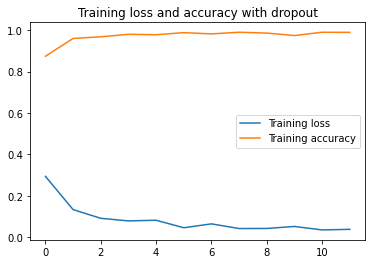

In [106]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(64,
                     dropout=0.15,
                     recurrent_dropout=0.15,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.001)  # Utilizzo dell'ottimizzatore Adam con un learning rate più basso
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history2 = model.fit(x_train,
                    y_train,
                    steps_per_epoch=500,
                    epochs=15)

# Plot 

loss = history2.history['loss']
acc = history2.history['accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training loss and accuracy with dropout')
plt.legend()

plt.show()

Confronto Dropout 0 e 1

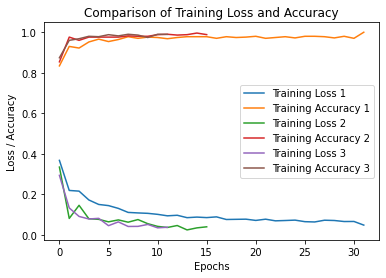

In [109]:

# Plot combinato
plt.figure()

# Grafico 1
plt.plot(history.history['loss'], label='Training Loss 1')
plt.plot(history.history['accuracy'], label='Training Accuracy 1')

# Grafico 2
plt.plot(history1.history['loss'], label='Training Loss 2')
plt.plot(history1.history['accuracy'], label='Training Accuracy 2')

# Grafico 3
plt.plot(history2.history['loss'], label='Training Loss 3')
plt.plot(history2.history['accuracy'], label='Training Accuracy 3')

plt.title('Comparison of Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()

plt.show()

LSTM 

In [ ]:
lstm_units = 128
dense_units = 32  

CompleteLSTM(x_train, x_test, y_train, y_test, results, ft, kf, perfInd, epochs, batch, lstm_units, dense_units, dropout_percentage, loss_function, metric)